# Python MiniProjet 
Louai Abdallah BENAISSA

In [1]:
from support import *

Reading the image 

In [ ]:
def load_image(path) : 
  image  = skimage.color.rgb2gray(skimage.io.imread(path))
  plt.imshow(image,'gray')
  plt.show()
  return image

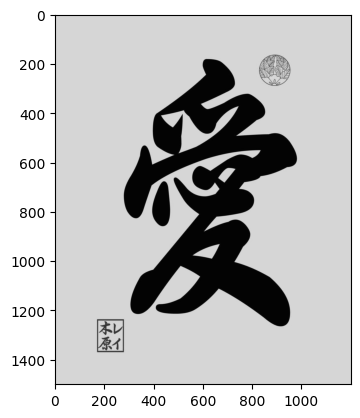

In [2]:
image = skimage.color.rgb2gray(skimage.io.imread("wp4014257.jpg"))
plt.imshow(image,'gray')
plt.show()

In [3]:
def LocalMaximum(R) : 
  # To find the local maxima of a 3x3 matrix, we can compare the matrix by its shifted version in all directions
  R     = np.array(R)
  up    = np.roll(R,-1,axis=0)
  down  = np.roll(R,1,axis=0)
  right = np.roll(R,1,axis=1)
  left  = np.roll(R,-1,axis=1)
  upleft = np.roll(up,-1,axis=1)
  upright = np.roll(up,1,axis=1)
  downright = np.roll(down,1,axis=1)
  downleft = np.roll(down,-1,axis=1)
  # The comparison
  is_max = ((C> up) & (C> down) & (C> right) & (C>left) & (C>upright) & (C>upleft) & (C>downright) & (C>downleft))
  localmaxonly = np.where(is_max,C,0)
  return localmaxonly

In [4]:
def DetecteurCoin(image):

  Sx = np.array([[0,0,0],[1,0,-1],[0,0,0]])
  Sy = np.array([[0,1,0],[0,0,0],[0,-1,0]])
  # We use convolutions to approximate Ix and Iy.
  Ix = sc.signal.convolve2d(image,Sx)
  Iy = sc.signal.convolve2d(image,Sy)
  # Calculate squares of the deriviatives.
  Ix2,Iy2,Ixy = Ix**2,Iy**2,Ix*Iy 
  # Calculate the sum of the 3x3 groupings of pixels.
  average= np.ones((3,3))
  Ixaverage = sc.signal.convolve2d(Ix2,average)
  Iyaverage = sc.signal.convolve2d(Iy2,average)
  Ixyaverage = sc.signal.convolve2d(Ixy,average)
  # And now we calculate the matrix C 
  R = np.float64(Ixaverage * Iyaverage - Ixyaverage**2 - 0.04 * (Ixaverage+Iyaverage)**2)
  a,b = R.shape
  R = R[2:a-2,2:b-2] 
  return R 
  

In [5]:
def VisualiserCoins(C,image,seuil):
  positions = np.argwhere(C>seuil)
  _,ax = plt.subplots() 
  ax.imshow(image,'gray')
  for y,x in positions : 
    plt.plot(x,y,marker='o',markersize=3,color='red')
  plt.show()


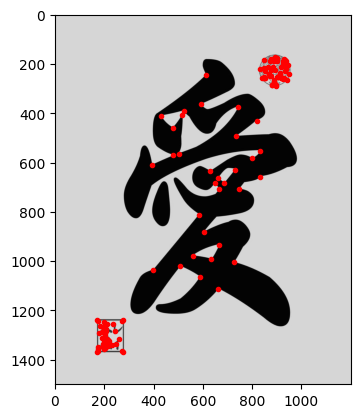

In [6]:
C = LocalMaximum(DetecteurCoin(image))
VisualiserCoins(C,image,0.4)